IMPORTACIÓN DE LIBRERÍAS

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

PROCESAMIENTO DE DATOS

In [15]:
datosPCA = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = datosPCA['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datosPCA = pd.concat( [ datosPCA,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datosPCA['Sueldo'] = datosPCA['Sueldo'].str.extract('(\d+)', expand=False).astype(float)
datosPCA['Sueldo'] = datosPCA['Sueldo']*1000
datosPCA.head()

datosPCA = datosPCA.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición', 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)

In [16]:
x_PCA = np.asanyarray(datosPCA.drop(columns=['Valoracion']))
y_PCA=datosPCA['Valoracion']

print(x_PCA.shape)
print(y_PCA.shape)

(3191, 47)
(3191,)


SEPARACIÓN DEL DATSET Y ESCALAMIENTO DE DATOS

In [17]:
x_trainPCA, x_testPCA, y_trainPCA, y_testPCA = train_test_split(x_PCA,y_PCA,test_size=0.2, random_state=3)
x_trainPCA, x_valPCA, y_trainPCA, y_valPCA = train_test_split(x_trainPCA, y_trainPCA, test_size=0.25, random_state=3)

In [18]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
x_trainPCA = scaler.fit_transform(x_trainPCA)
x_testPCA = scaler.fit_transform(x_testPCA)

APLICANDO PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(x_trainPCA)
pca.fit(x_testPCA)

PCA(n_components=2)

In [21]:
x_trainPCA = pca.transform(x_trainPCA)
x_testPCA = pca.transform(x_testPCA)

In [22]:
print(x_trainPCA.shape)
print(x_testPCA.shape)

(1914, 2)
(639, 2)


CONSTRUCCIÓN DEL MODELO

In [23]:
modeloPCA = keras.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(2,)),
    keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001,
momentum=0.1)

modeloPCA.compile(optimizer = sgd,
               loss='mse',
               metrics=['mae'])

In [24]:
historyPCA = modeloPCA.fit(x_trainPCA, y_trainPCA, epochs= 600, batch_size= 10, validation_data= (x_testPCA, y_testPCA))

Epoch 1/600
192/192 [==============================] - 1s 2ms/step - loss: 800.8917 - mae: 22.1533 - val_loss: 203.6769 - val_mae: 10.8792
Epoch 2/600
192/192 [==============================] - 0s 1ms/step - loss: 135.2840 - mae: 8.8132 - val_loss: 79.0510 - val_mae: 6.9605
Epoch 3/600
192/192 [==============================] - 0s 1ms/step - loss: 62.0679 - mae: 6.1334 - val_loss: 44.8380 - val_mae: 5.2839
Epoch 4/600
192/192 [==============================] - 0s 1ms/step - loss: 42.9801 - mae: 5.0887 - val_loss: 36.7253 - val_mae: 4.7470
Epoch 5/600
192/192 [==============================] - 0s 1ms/step - loss: 36.6215 - mae: 4.6803 - val_loss: 33.6667 - val_mae: 4.4860
Epoch 6/600
192/192 [==============================] - 0s 1ms/step - loss: 33.7742 - mae: 4.4766 - val_loss: 32.1855 - val_mae: 4.4217
Epoch 7/600
192/192 [==============================] - 0s 1ms/step - loss: 32.3141 - mae: 4.3805 - val_loss: 30.2867 - val_mae: 4.2824
Epoch 8/600
192/192 [=============================

VISUALIZACIÓN DE MÉTRICAS

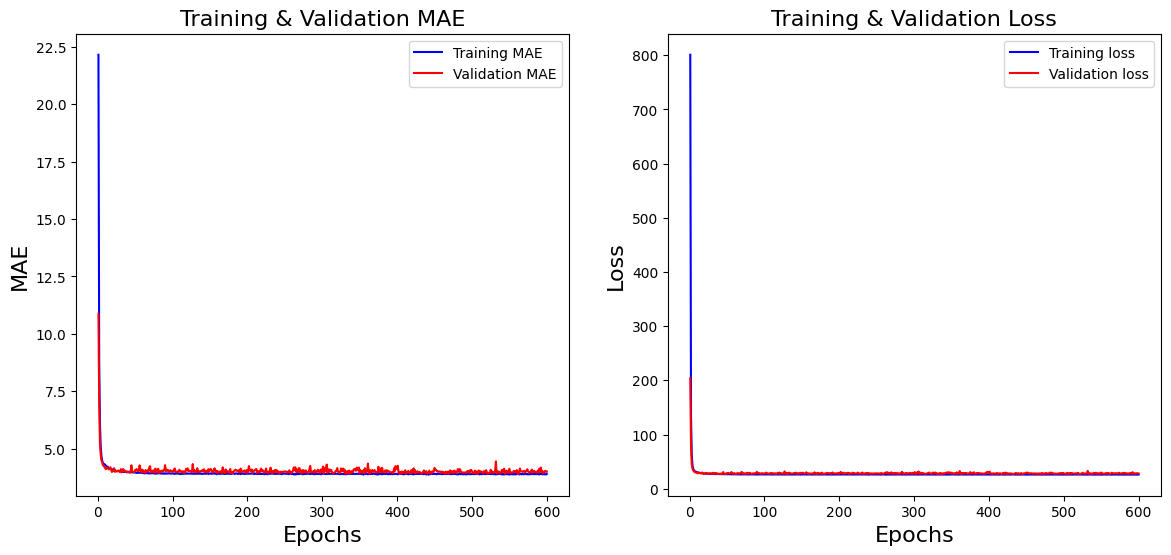

In [28]:
import matplotlib.pyplot as plt
 
#history_dict = history.history
history_dict = historyPCA.history
loss_values = history_dict['loss']
val_loss_values= history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training MAE')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation MAE')
ax[0].set_title('Training & Validation MAE', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('MAE', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

R CUADRADO AJUSTADO

In [26]:
from sklearn.metrics import r2_score
y_train_pred = modeloPCA.predict(x_trainPCA)
y_test_pred = modeloPCA.predict(x_testPCA)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_trainPCA, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_testPCA, y_test_pred)))

20/20 [==============================] - 0s 645us/step
The R2 score on the Train set is:	0.928
The R2 score on the Test set is:	0.921
